In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Import the dataset into the pandas dataframe.
The dataset represents a list of pacients described by features such as nr. of pregnancies, glucose, blood preasure etc.
The last column, Outcome represents if the given pacient have or don't have diabetes (1 - Yes/ 0 - No).
 At the end of this work, we should have a trained model on the given feature space to determine if a person has diabetes or not

In [2]:
df = pd.read_csv('/content/Healthcare-Diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check some dataframe statistics such as basic infom number of duplicates and null values
df.info(), df.duplicated().sum(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


(None,
 0,
 Id                          0
 Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64)

<Axes: >

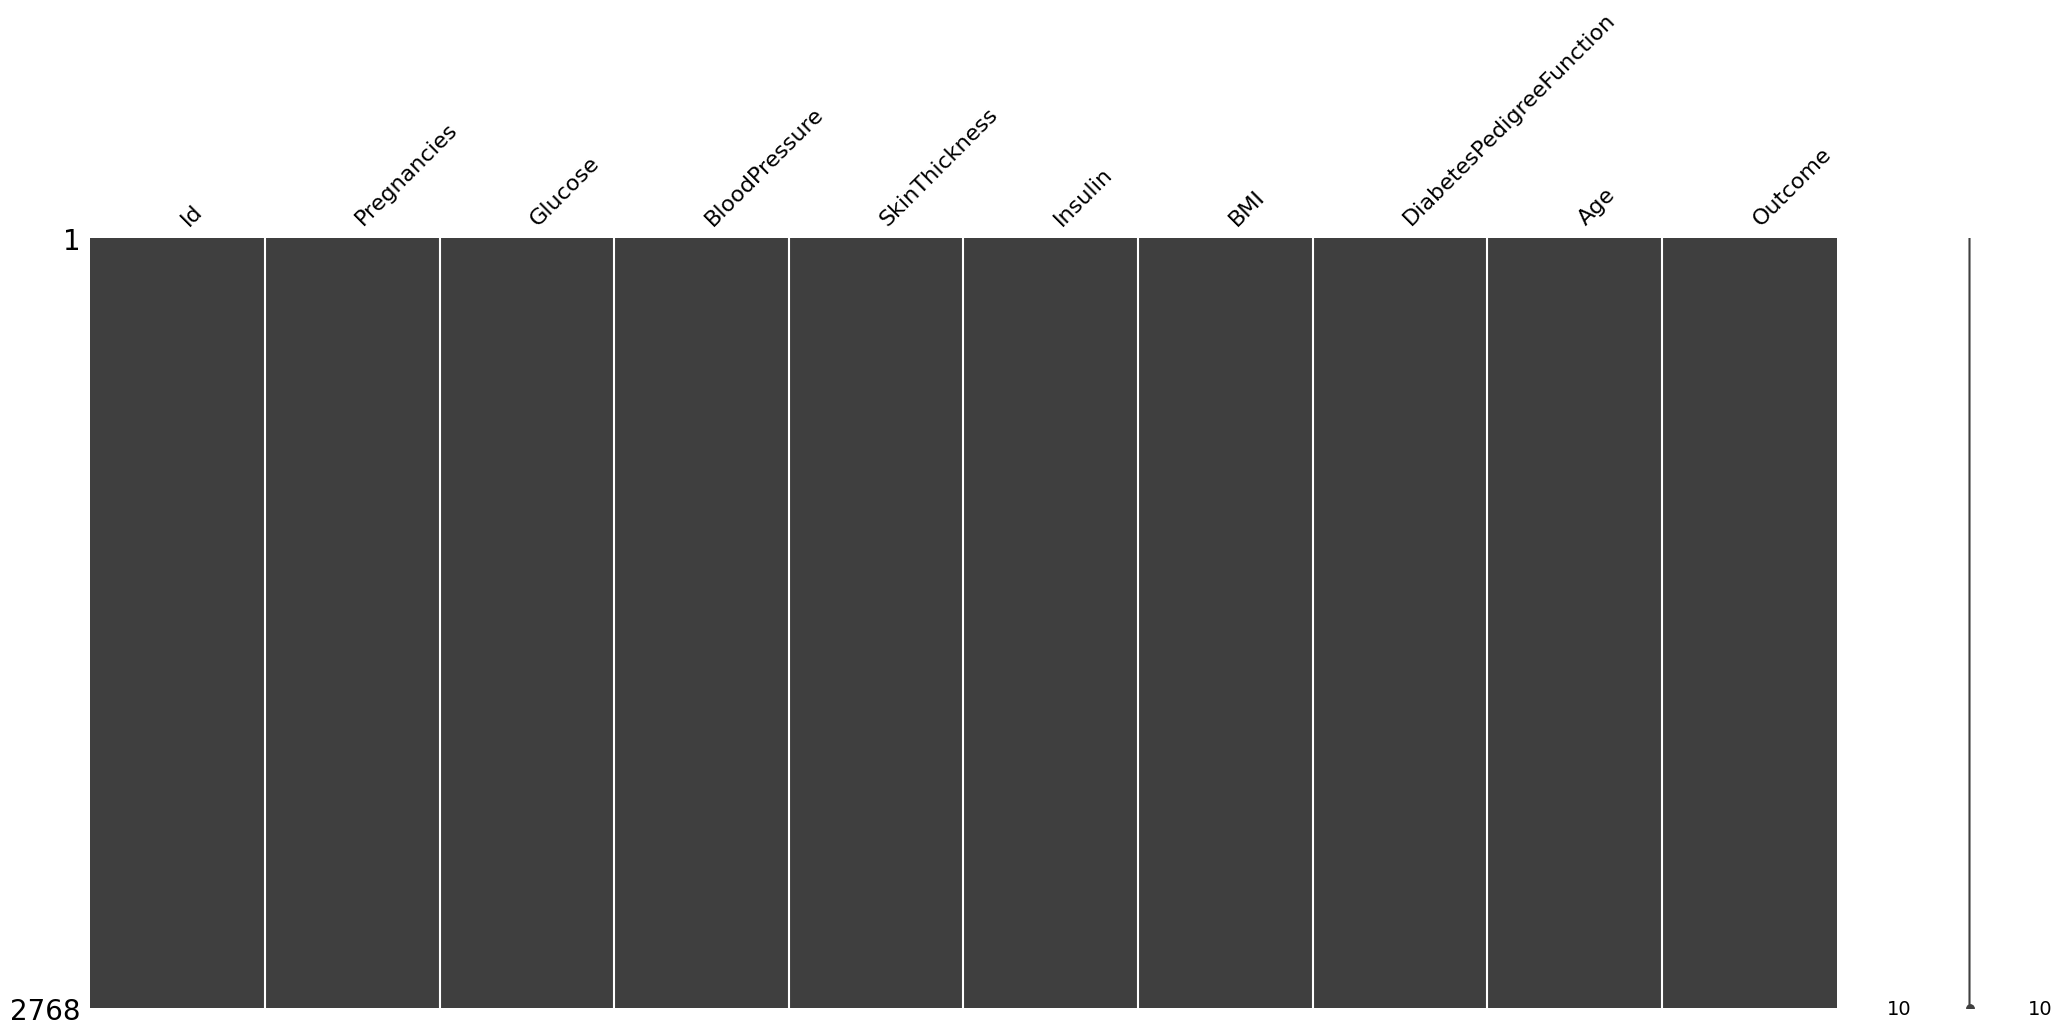

In [4]:
# Plot the dataset to view graphicaly the statistics above
msno.matrix(df)

# Apparently this dataset has zero null values and no duplicate rows. No further preprocessing is required regarding this part.

In [5]:
# I tried scaling the dataset using MinMaxScaler, but the accuracy from it actually droped by 0.1, so I did not use it futher
columns_to_scale = df.columns[:-1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[columns_to_scale])
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled[df.columns[-1]] = df[df.columns[-1]]
df_scaled

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.000000,0.352941,0.743719,0.590164,0.318182,0.000000,0.416873,0.234415,0.483333,1
1,0.000361,0.058824,0.427136,0.540984,0.263636,0.000000,0.330025,0.116567,0.166667,0
2,0.000723,0.470588,0.919598,0.524590,0.000000,0.000000,0.289082,0.253629,0.183333,1
3,0.001084,0.058824,0.447236,0.540984,0.209091,0.111111,0.348635,0.038002,0.000000,0
4,0.001446,0.000000,0.688442,0.327869,0.318182,0.198582,0.534739,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...,...
2763,0.998554,0.117647,0.376884,0.524590,0.218182,0.065012,0.368486,0.124680,0.200000,0
2764,0.998916,0.470588,0.899497,0.590164,0.381818,0.153664,0.405707,0.273698,0.250000,1
2765,0.999277,0.352941,0.427136,0.639344,0.000000,0.000000,0.387097,0.129804,0.350000,0
2766,0.999639,0.000000,0.648241,0.901639,0.418182,0.153664,0.832506,0.102904,0.083333,1


In [13]:
# Splitting the dataset into training and testing parts
X = df.iloc[:,:-1] # Get all but last column
y = df.iloc[:, -1] # Get only the last column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Running a GridSearch for basic machine learning models with default parameters to find the best model for this task

In [16]:
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

best_model = None
best_accuracy = 0

for model_name, model in models.items():
  grid_search = GridSearchCV(model, param_grid={}, cv=5)
  grid_search.fit(X_train, y_train)
  best_model_for_this = grid_search.best_estimator_
  accuracy = accuracy_score(y_test, best_model_for_this.predict(X_test))
  print(f'{model_name} Accuracy: {accuracy}')
  if accuracy > best_accuracy:
    best_model = best_model_for_this
    best_accuracy = accuracy

print("-"*20)
print(f'Best Model: {best_model}\nBest Accuracy: {best_accuracy}')

Random Forest Accuracy: 0.9819494584837545
SVM Accuracy: 0.6624548736462094
Logistic Regression Accuracy: 0.7725631768953068
KNN Accuracy: 0.6660649819494585
Decision Tree Accuracy: 0.9638989169675091
Gradient Boosting Accuracy: 0.8826714801444043
--------------------
Best Model: RandomForestClassifier()
Best Accuracy: 0.9819494584837545


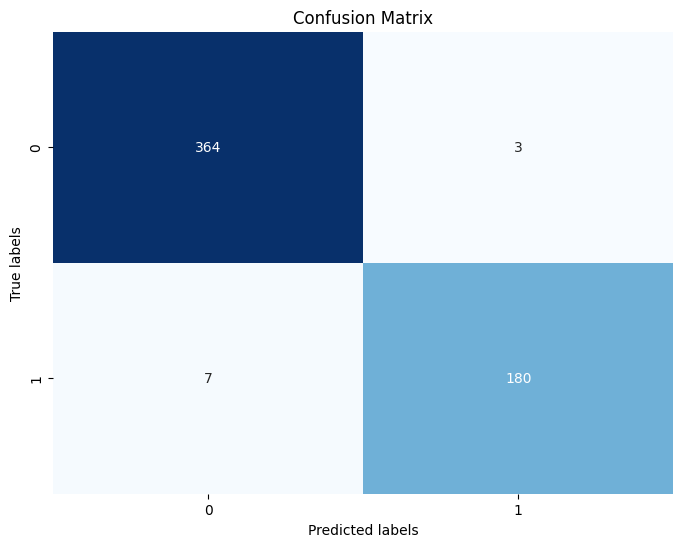

In [18]:
cm = confusion_matrix(y_test, best_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# The best model with an accuracy of 98% turns out to be the RandomForestClasssifier(). From the confusion matrix, the model correcty classified Yes(180) and No (364) number of times, with false positive (3) and false negative (7) number of times.